In [115]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pickle

# Low rank approximation and denoising of images


## 1) Low rank approximation


We begin by briefly summarising how the four methods used in this lab can be used to obtain low rank approximations of our data. In this lab we will be working with images, where each pixel is encoded by four values, namely RGBA (red, green, blue, alpha). These four dimensions encoding each pixel will be referred to as the four channels of our images. You should create low rank approximations separately for each channel, i.e., to obtain a low rank approxiamtion for the images, you should separately calculate the low rank approximation for each channel of the input image and then concatinate these low rank approximations. Therefore, in this lab our data  will be denoted by $X_i \in R^{n\times m}$ for $i \in \{R,G,B,A\}.$



**PCA:** Let $M_i\in R^{n\times m} $ be the matrix containing the column means of $X_i$ in each column. Further, let $C_i = X_i -  M_i$ denote the data matrix $X_i,$ where the column mean is substracted from each column. Furthermore, let $U_k\in R^{m\times k}$ denote the right singular vectors of $C_i$. Then, the PCA low-rank approximation, denoted $\tilde{X}_i^{PCA},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{PCA} = C_i U_k U_k^T + M.
\end{equation}


**SVD:** Consider the singular value decomposition of $X_i = V \Sigma W^T.$ Further, let $V_k \in R^{n\times k},$ $W_k \in R^{m\times k}$ and $\Sigma_k \in R^{k\times k}$ contain the first $k$ left and right singular vectors and the largest $k$ singular values, respectivly. Then, the singular value low rank approximation, denoted $\tilde{X}_i^{SVD},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{SVD} = V_k \Sigma_k W_k^T.
\end{equation}


**NMF:** The non-negative matrix factorisation is iteratively calculated and directly produces a low rank approximation of $X_i$ into factors denoted by $A \in R^{n \times k}$ and $B\in R^{k \times m}.$ Hence,   
\begin{equation}
\tilde{X}_i^{NMF} = AB.
\end{equation}

**MDS:** 
Let $M_i\in R^{n\times m} $ be the matrix containing the column means of $X_i$ in each column. Further, let $C_i = X_i -  M_i$ denote the data matrix $X_i,$ where the column mean is substracted from each column. 
For the multidimensional scaling algorithm we utilise the singular value decomposition of the matrix denoted $C_i C_i^T.$ Let $Q_k \in R^{n\times k}$ denote the matrix containing the $k$ singular vectors corresponding to the $k$ largest singluar values of $C_i C_i^T.$ Then, the low rank approximation, denoted $\tilde{X}_i^{MDS},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{MDS} =  Q_k Q_k^T C_i +M_i.
\end{equation}

















We begin with a theoretical question.

>**Question 1: (4 Points)** The principal components produced in the PCA algorithm estimate $C_i U_{jk}^\star,$ where $U_{jk}^\star$ contains the $j^{\mathrm{th}}$ eigenvector of the *true* covariance matrix (Var[C_i]) of our data. Proof that the true principal components $C_i U_{jk}^\star$ for $j \in \{1,\ldots, m\}$ are uncorrelated and relate their variance to the eigenvalues of the true covariance matrix. 


Now we load the image you will be working with in this assessement.





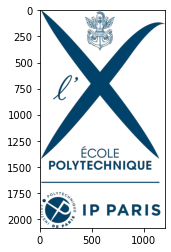

In [116]:
logo = mpimg.imread('1200px-POLYTECHNIQUE-IP_PARIS.png') 
plt.imshow(logo) 
plt.show()

>**Task 1: (8 Points)** Complete the below functions to calculate low rank approximations of an input image with 4 channels using the PCA, SVD, NMF and MDS algorithms. (You will not receive full marks if you use the inbuilt  PCA, NMF and MDS implementation.)

In [156]:
def M(X):
    return np.array( [np.mean(X,axis=0)]*X.shape[0])
     

def pca(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
        U (np.array, dim: m,k,4): singular vectors used to obtain the low rank approximation
    """
    
    #Please insert the code for Task 1 here
    U = []
    X_low_rank_approx = np.zeros_like(X)
    for i in range(X.shape[2]):
        Mi =  M(X[:,:,i])
        C = X[:,:,i] - Mi       
        # svd decomposition
        v,s,uT = np.linalg.svd(C)
        # taking first k elemetns of right singular vectors
        uT = uT[:k,:] # rows of uT are right singular vectors
        u  = uT.T     # columns of u are right singular vectors
        U.append(u)
        X_low_rank_approx[:,:,i] = np.dot( np.dot( C, u), uT) + Mi 
    
    return X_low_rank_approx, np.array(U)


def svd(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    #Please insert the code for Task 1 here    
    X_low_rank_approx = np.zeros_like(X)
    for i in range(X.shape[2]): 
        V,E,WT = np.linalg.svd(X[:,:,i])
        X_low_rank_approx[:,:,i] = np.dot( np.dot( V[:,:k], np.diag(E)[:k,:k] ), (WT[:k,:]) )  
        
    return X_low_rank_approx




def nmf(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
#     Iterations   Fnorm_dist
 
#      10          0.49071836    
#      20          0.45887542
#      30          0.4476426
#      40          0.44098026
#      50          0.43866783
#      60          0.4376839
#      70          0.4371564
#      80          0.43683672
#      90          0.4366289
#     100          0.4364844
# From this experiment we can say that after 20 iterations there are no significant changes.      
    #Please insert the code for Task 1 here    
    X_low_rank_approx = np.zeros_like(X)
    eps = 1e-8 # small number for stability
    for i in range(X.shape[2]):
        Xi = X[:,:,i] + np.ones(X[:,:,i].shape)*eps
        V, S, WT = np.linalg.svd(Xi, full_matrices=False)
        B = np.abs(WT[:k,:]) # first k rows of B are left  Sing. Vec.
        A = np.abs(V[:,:k])  # first k columns of A are rihgt Sing. Vec.
        for j in range(20): # Updating A and B
            B = np.multiply(B, np.dot(A.T,Xi)/(np.dot(np.dot(A.T,A),B)))
            A = np.multiply(A, np.dot(Xi,B.T)/(np.dot(np.dot(A,B),B.T)))
        X_low_rank_approx[:,:,i] = np.dot(A, B)    
    return X_low_rank_approx



def mds(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    #Please insert the code for Task 1 here    
    X_low_rank_approx = np.zeros_like(X)
    for i in range(X.shape[2]):
        Mi = M(X[:,:,i])
        Ci = X[:,:,i] - Mi     
        # svd decomposition
        Qk,S,UT = np.linalg.svd(np.dot(Ci,Ci.T))
        # taking first k elemetns of right singular vectors
        Qk = Qk[:,:k] # columns of Qk are right singular vectors
        X_low_rank_approx[:,:,i] = np.dot( np.dot( Qk, Qk.T), Ci) + Mi  
    
    return X_low_rank_approx


>**Task 2: (1 Points)** Apply the functions implemented in Task 1 to produce low rank approximation images for $k$ equals 1, 5, 10, 30 and 60 of the logo and plot the results using the provided function.

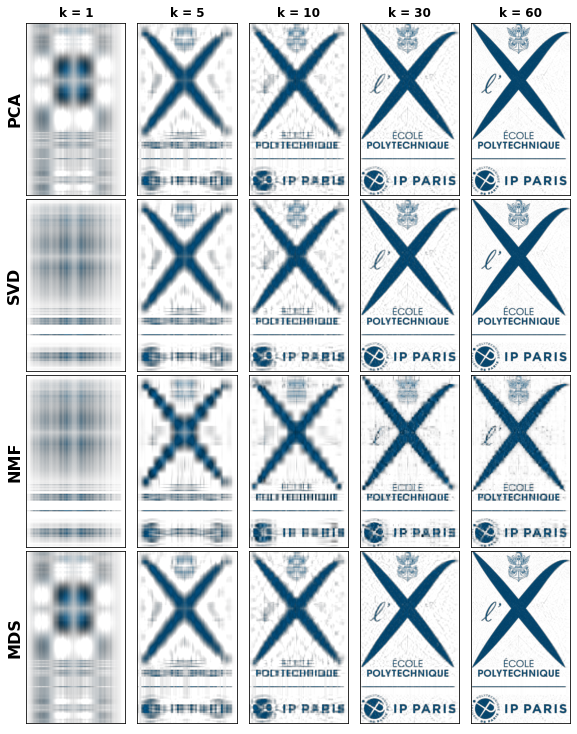

In [22]:

#Please insert the code for Task 2 here
results_task2 = np.zeros(logo.shape + tuple([20]))
fig, axs = plt.subplots(4,5, figsize=(8,10))
# logo_norm = logo/np.linalg.norm(logo,axis=0) # logo normalized
for i, k in enumerate([1,5,10,30,60]):
    results_task2[:,:,:,i],U  = pca(logo,k)
    results_task2[:,:,:,i+5]  = svd(logo,k)
    results_task2[:,:,:,i+10] = nmf(logo,k)
    results_task2[:,:,:,i+15] = mds(logo,k)


titles = ['k = 1','k = 5','k = 10','k = 30','k = 60']
methods = ['PCA', 'SVD', 'NMF', 'MDS']
for i in range(4):
    axs[i,0].set_ylabel(methods[i], fontsize=16,fontweight='bold')
    for j in range(5):
        if i==0:
            axs[i,j].set_title(titles[j], fontweight='bold')
        axs[i,j].imshow(np.clip(results_task2[:,:,:,i*5+j],0,1))
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
fig.tight_layout(pad=0)

with open('results/results_task2.pickle', 'wb') as f:
    pickle.dump(results_task2, f)

>**Question 2: (2 Points)** Visually compare the low rank approximations and qualitatively assess (i) how the quality of the low rank approximatino varies as $k$ increases and (ii) which method produces the least lossy compression of the image. (No calculations or further processing are required here).

The quality of the PCA reconstruction is often evaluated by calculating the fraction of the total variance of the image that is preserved in the reconstructed image. Hence, the first evaluation metric we want to use to assess the quality of the reconstruction is the sum of the eigenvalues of the estimated covariance matrix $(\tilde{X}_i^{h})^T \tilde{X}_i^{h}/m$ for $h \in \{\text{PCA, SVD, NMF, MDS}\}$ divided by the sum of eigenvalues of the estimated covariance matrix of the original image $X_i^T X_i/m.$ The final metric is produced by averaging the fraction of the sum of eigenvalues over all four image channels.

The MDS algorithm minimises the *Stress* metric, which is calculated as follows,
\begin{equation}
    Stress = \sqrt{\dfrac{\sum_{a=1}^n \sum_{b=1}^n (d_{ab} - \delta_{ab})^2}{\sum_{a=1}^n \sum_{b=1}^n \delta_{ab}^2}},
\end{equation} 
where $d_{ab}$ the Euclidian distance between rows $a$ and $b$ of matrix $\tilde{X}_i^{h}$ for $h \in \{\text{PCA, SVD, NMF, MDS}\}$ and $\delta_{ab}$ contains the Euclidian distance between rows $a$ and $b$ of $X_i$. Again the final metric is produced by averaging the Stress metric over all four image channels.

The performance of the SVD and NMF reconstruction is commonly measured using the difference of the original image and the reconstructed image in Frobenius norm. This will be the third metric we will consider to compare our low rank approximations.

>**Task 3: (7 Points)** Fill out the code to calculate the three presented evaluation metrics of our methods. Then use these functions to quanititatively assess the approximation error of our four methods when $k=10.$ Fill your results into the provided table. 

In [23]:
def evals(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        eval_fraction (float): the ratio of the explained variance as described in the problem description
    """
    
    #Please insert the code for Task 3 here
    eval_fraction = 0
    for i in range(X.shape[2]):
        eigval1, eigvec1 = np.linalg.eig( np.dot( X[:,:,i].T, X[:,:,i])/X.shape[1])
        eigval2, eigvec2 = np.linalg.eig( np.dot(X_low_rank_approx[:,:,i].T,X_low_rank_approx[:,:,i])/X.shape[1]) 
        eval_fraction += (np.sum(eigval2)/np.sum(eigval1))
    return np.real(eval_fraction/4)

def stress(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        stress (float): the stress metric value
    """
    
    #Please insert the code for Task 3 here
    stress = 0
    for i in range(X.shape[2]): # for each channel
        nominator = 0
        denominator = 0
        # calculation of stress of one channel 
        for a in range(X.shape[0]):
            for b in range(X.shape[0]):
                delta_square = np.sum( np.square( X[a,:,i] - X[b,:,i]) )
                d_square     = np.sum( np.square(X_low_rank_approx[a,:,i] - X_low_rank_approx[b,:,i]))
                denominator += delta_square
                nominator   += np.square( np.sqrt( d_square ) - np.sqrt(delta_square) ) 
        stress += np.sqrt(float((nominator/denominator)))
    return stress/4


def Fnorm_difference(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        diff (float): the difference of the two inputs in Frobenius norm
    """
    diff = np.linalg.norm(X-X_low_rank_approx)/np.linalg.norm(X)
    return diff

eps = 1e-8 # small number for stabilization of nmf
results_task3 = np.zeros(shape=[4,3])
X_pca, u = pca(logo,10)
X_svd = svd(logo,10)
X_nmf = nmf(logo,10)
X_mds = mds(logo,10)

results_task3[0][0] = evals(logo,X_pca)
results_task3[1][0] = evals(logo,X_svd)
results_task3[2][0] = evals(logo,X_nmf)
results_task3[3][0] = evals(logo,X_mds)

results_task3[0][1] = stress(logo,X_pca)
results_task3[1][1] = stress(logo,X_svd)
results_task3[2][1] = stress(logo,X_nmf)
results_task3[3][1] = stress(logo,X_mds)

results_task3[0][2] = Fnorm_difference(logo,X_pca) 
results_task3[1][2] = Fnorm_difference(logo,X_svd)
results_task3[2][2] = Fnorm_difference(logo,X_nmf)
results_task3[3][2] = Fnorm_difference(logo,X_mds)

#Please insert the code for Task 3 here to fill the results matrix

metrics = ['evals', 'stress', 'norm']
methods = ['PCA', 'SVD', 'NMF', 'MDS']

print('\t',end='')
for j in range(3):
    print(metrics[j], end='\t')
print('')
for i in range(4):
    print(methods[i], end='\t')
    for j in range(3):
        print(np.round(results_task3[i,j],4),'\t', end='')
    print('')

with open('results/results_task3.pickle', 'wb') as f:
    pickle.dump(results_task3, f)       


	evals	stress	norm	
PCA	0.8372 	0.1479 	0.4037 	
SVD	0.8364 	0.1486 	0.4048 	
NMF	0.7977 	0.2232 	0.4476 	
MDS	0.8372 	0.1479 	0.4037 	


## 2) Orthogonal transformation of the input data

Now we will work with another image, which was obtained from the logo we have been working with so far, by applying a random orthogonal transformation to the pixel values. Hence, if $X_i$ contains the pixel values in the $i^{\mathrm{th}}$ channel of the original image and  $X_i'$ contains the pixel values in the $i^{\mathrm{th}}$ channel of the transformed image, then they are related as follows,
$$
X_i' = X_i Q \qquad ~ \qquad \forall i,
$$
where $Q$ is an orthogonal matrix which was randomly sampled.

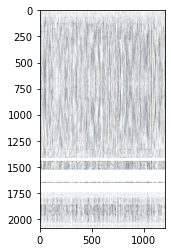

In [154]:
with open('transformed_image.pickle', 'rb') as f:
    transformed_image = pickle.load(f)
    
plt.imshow(np.clip(transformed_image,0,1))
plt.show()

>**Task 4: (2 Points)** Repeat task 3 on the transformed image. 




In [158]:
results_task4 = np.zeros(shape=[4,3])

#Please insert the code for Task 4 here to fill the results matrix

# tr_pca, u = pca(transformed_image,10)
# tr_svd = svd(transformed_image,10)
tr_nmf = nmf(transformed_image,10)
# tr_mds = mds(transformed_image,10)

results_task4[0][0] = evals(transformed_image,tr_pca)
results_task4[1][0] = evals(transformed_image,tr_svd)
results_task4[2][0] = evals(transformed_image,tr_nmf)
results_task4[3][0] = evals(transformed_image,tr_mds)

results_task4[0][1] = stress(transformed_image, tr_pca)
results_task4[1][1] = stress(transformed_image, tr_svd)
results_task4[2][1] = stress(transformed_image, tr_nmf)
results_task4[3][1] = stress(transformed_image, tr_mds)

results_task4[0][2] = Fnorm_difference(transformed_image,tr_pca) 
results_task4[1][2] = Fnorm_difference(transformed_image,tr_svd)
results_task4[2][2] = Fnorm_difference(transformed_image,tr_nmf)
results_task4[3][2] = Fnorm_difference(transformed_image,tr_mds)

metrics = ['evals', 'stress', 'norm']
methods = ['PCA', 'SVD', 'NMF', 'MDS']

print('\t',end='')
for j in range(3):
    print(metrics[j], end='\t')
print('')
for i in range(4):
    print(methods[i], end='\t')
    for j in range(3):
        print(np.round(results_task4[i,j],4),'\t', end='')
    print('')
    
with open('results/results_task4.pickle', 'wb') as f:
    pickle.dump(results_task4, f)   

	evals	stress	norm	
PCA	0.8372 	0.1479 	0.4037 	
SVD	0.8364 	0.1486 	0.4048 	
NMF	539.1117 	21.0956 	18.3282 	
MDS	0.8372 	0.1479 	0.4037 	


>**Question 3: (4 Points)** Prove that the low rank approximations of $X_i$ and $X_i'$ obtained using the PCA algorithm capture equal amounts of the variance of the two images. Furthermore, proof that the principal components ($C_i U_{jk},$ and $C_i' U_{jk}'$ for $j\in \{1,\ldots, k\})$ are equal. (Note that in practice you might encounter principal components which are unequal since the obtained eigenvectors have opposing signs. This should not be a problem for you here since this question should be answered using a theoretical pen and paper proof.)  

## 3) Image Denoising

In this section we will use the eigenvectors used in the PCA of the original logo to denoise two noisy images of the logo. In the cell below we load the two noisy images.

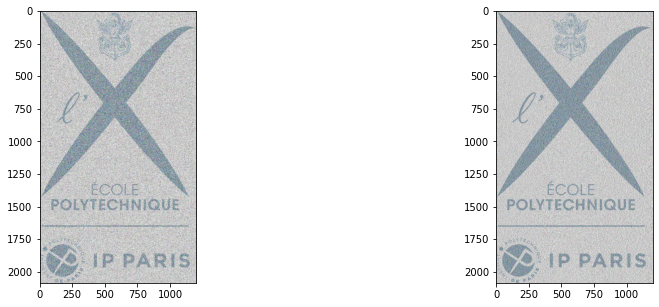

In [161]:
with open('noisy_image1.pickle', 'rb') as f:
    noisy_image1 = pickle.load(f)
    
with open('noisy_image2_edited.pickle', 'rb') as f:
    noisy_image2 = pickle.load(f)
    
fig, axs = plt.subplots(1,2, figsize=(15,5))  
axs[0].imshow(np.clip(noisy_image1,0,1))
axs[1].imshow(np.clip(noisy_image2,0,1))
plt.show()

**Task 5: (6 Points)** Use the eigenvectors used in the PCA algorithm on the original image to obtain low rank approximations of the noisy images. Use the number of eigenvectors which minmises the distance of the denoised image and the original logo in the explained variance metric introduced in Section 1). Make sure to enter the number of used eigenvectors in the plot titles.


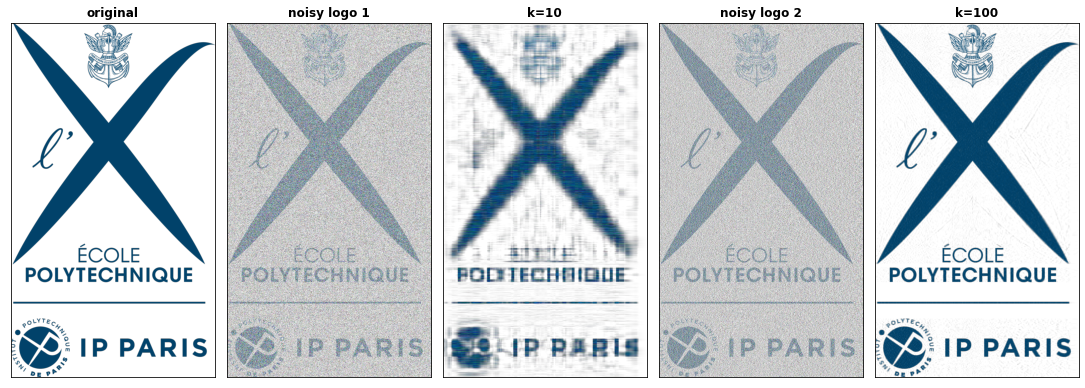

In [162]:
# Dynamic function for denoising an image
# Fk ~ Fnorm of denoised image with k elements
# Compares Fk-1 and Fk till Fk-1 < Fk, and returns denoised image with k-1 elements
# Example with 2nd image, starts by iterating with 10 till F100 < F110 
# And after finding small range, iterates by 1 till F100 < F101
def denoising(U,X,noisy):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        noisy (np.array, dim: n,m,4): containing the image channel to be processed
        U (np.array, dim: m,k,4): singular vectors used to obtain denoised image

    Returns:
        k (int): the number of elements to be used for denoising 
        denoised: denoised image
    """
    Fnorm_current = 1
    Fnorm_prev = 1
    k = 0
    step = 10
    denoised = np.zeros_like(X)
    while( k <= U.shape[2] ): # U.shape[2] max size of K
        Fnorm_prev = Fnorm_current
        for i in range(X.shape[2]):
            denoised[:,:,i] = np.dot( np.dot( noisy[:,:,i], U[i,:,:k]), U[i,:,:k].T)
        Fnorm_current = Fnorm_difference(X, denoised)
        if( Fnorm_prev < Fnorm_current ):
            if(step == 1):
                k -= 1
                for i in range(X.shape[2]):
                    denoised[:,:,i] = np.dot( np.dot( noisy[:,:,i], U[i,:,:k]), U[i,:,:k].T)
                return k, denoised 
            else:
                k -= (step+1)
                step = 1
                Fnorm_current = Fnorm_prev
        k += step

densoised_image1 = np.zeros(logo.shape)
densoised_image2 = np.zeros(logo.shape)

# Please insert the code for Task 5 here
x1,U = pca(logo,1200) # Obtaining eigenvectors

k1, densoised_image1 = denoising(U, logo, noisy_image1)
k2, densoised_image2 = denoising(U, logo, noisy_image2)


fig, axs = plt.subplots(1,5, figsize=(15,5))    
axs[0].imshow(logo)
axs[1].imshow(np.clip(noisy_image1,0,1))
axs[2].imshow(np.clip(densoised_image1,0,1))
axs[3].imshow(np.clip(noisy_image2,0,1))
axs[4].imshow(np.clip(densoised_image2,0,1))



titles = ['original', 'noisy logo 1', 'k='+str(k1), 'noisy logo 2', 'k='+str(k2)]
for i in range(5):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(titles[i], fontweight='bold')
fig.tight_layout(pad=0)


with open('results/results_task5.pickle', 'wb') as f:
    pickle.dump([densoised_image1, densoised_image2], f)  


**Question 4: (2 Points)** Comment on how the low rank approximation affects the level of noise in the images and explain the observed change in the level of noise visible in the low rank approximations. (We don't expect you to write more than 4 sentences in this answer.) 

**Question 5: (4 Points)** Are you able to draw conclusions about the structural properties of the noise added to the two images from your success in denoising them?